# Data Visualization Case Study: Diamonds

## Table of Contents
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#data'>Description of the Data</a></li>
    <li><a href='#setup'>Setup</a></li>
    <li><a href='#overview'>Overview of the Dataset</a></li>
    <li><a href='#univar_exploration'>Univariate Exploration</a></li>
        <ul>    
            <li><a href='#price'>Price</a></li>
            <li><a href='#carat'>Carat weight</a></li>
            <li><a href='#cut_color_clarity'>Cut, color and clarity</a></li>
        </ul>
    <li><a href='#bivar_exploration'>Bivariate Exploration</a></li>
        <ul>    
            <li><a href='#price_vs_carat'>Price vs. carat weight</a></li>
            <li><a href='#price_vs_ccc'>Price vs. cut, color and clarity</a></li>
            <li><a href='#carat_vs_ccc'>Carat weight vs. cut, color and clarity</a></li>
        </ul>
</ul>

<a id='intro'></a>
## Introduction
This visualization case study is a part of the Data Visualization course within the Data Analyst Nanodegree Program at Udacity. The dataset used for data visualization practice contains diamonds data. The aim is to explore the data using univariate, bivariate and multivariate visualizations, and provide answers to questions related to the importance of the selected factors when it comes to the price. 

<a id='data'></a>
## Description of the Data
The dataset includes prices and attributes of approximately 54,000 round-cut diamonds. There are ten columns: 
- __price:__ price in dollars (data was collected in 2008)
- __carat:__ diamond weight (1 carat = 0.2 grams)
- __cut:__ quality of diamond cut and it affects its shine. Grades are as follows:
    - fair (low)
    - good
    - very good
    - premium
    - ideal (best)
- __color:__ measure of diamond coloration. Increasing grades: 
    - J (some color)
    - I
    - H
    - G
    - F
    - E
    - D (colorless)
- __clarity:__ measure of diamond inclusions. Increasing grades: 
    - I1 (inclusions)
    - SI2
    - SI1
    - VS2
    - VS1
    - VVS2
    - VVS1
    - IF (internally flawless)
- __x, y, z:__ diamond length, width, and depth, respectively, in mm
- __table:__ ratio of width of top face of diamond to its overall width, as a percentage
- __depth:__ proportional depth of diamond, as a percentage; computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width

The study is focused on the first five variables: price, carat, cut, color and clarity. 

<a id='setup'></a>
## Setup
First, prepare the workspace - import all modules and set matplotlib backend. Load the dataset into a Pandas dataframe.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('data/diamonds.csv')

<a id='overview'></a>
## Overview of the Dataset
Look at size and composition of the dataset:

In [3]:
# high-level overview of data shape and composition
print('Shape of the dataset: {}\n'.format(diamonds.shape))
print('Data types:')
print(diamonds.dtypes, '\n')
print('First 10 rows:')
diamonds.head(10)

Shape of the dataset: (53940, 10)

Data types:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object 

First 10 rows:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Print descriptive statistics for numeric variables:

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='univar_exploration'></a>
## Univariate Exploration
<a id='price'></a>
### Price
Create a histogram since price is a numeric variable:

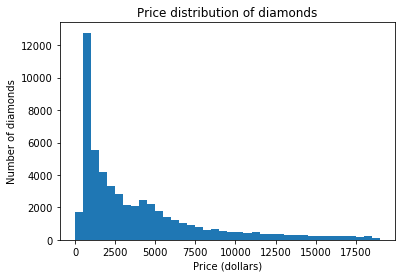

In [5]:
# univariate plot of diamond prices
bin_edges = np.arange(0, diamonds['price'].max()+500, 500)
sb.distplot(diamonds['price'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})

plt.title('Price distribution of diamonds')
plt.xlabel('Price (dollars)')
plt.ylabel('Number of diamonds');

The distribution of price is highly positively skewed, which makes it a proper candidate for log scaling:

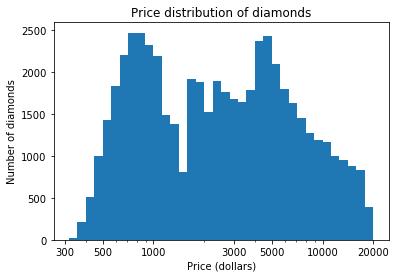

In [6]:
# univariate plot of diamond prices - log scale
bin_edges = 10 ** np.arange(2.5, np.log10(diamonds['price'].max())+0.05, 0.05)
sb.distplot(diamonds['price'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})

plt.xscale('log')
tick_locs = [300, 500, 1000, 3000, 5000, 10000, 20000]
plt.xticks(tick_locs, tick_locs)

plt.title('Price distribution of diamonds')
plt.xlabel('Price (dollars)')
plt.ylabel('Number of diamonds');

The data follows bimodal distribution under the log scale. There is a large peak between 500 and 1000, and another one between 4000 and 5000. It doesn't have a smooth tale on its right side. 

<a id='carat'></a>
### Carat weight
Carat weight is a numeric variable - plot a histogram:

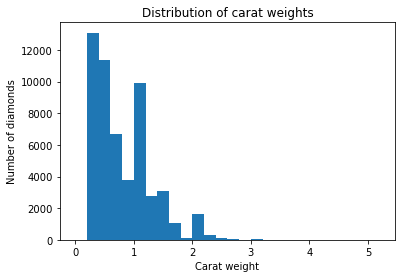

In [7]:
# histogram of carat weights
bin_edges = np.arange(0, diamonds['carat'].max()+0.2, 0.2)
sb.distplot(diamonds['carat'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})
plt.title('Distribution of carat weights')
plt.xlabel('Carat weight')
plt.ylabel('Number of diamonds');

There is a peak between 0.2 and 0.6, and a spike corresponding to a bin between 1.0 and 1.2. Let's zoom in:

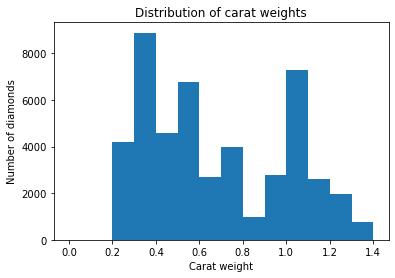

In [8]:
# histogram of carat weights - zoom in
bin_edges = np.arange(0, 1.4+0.1, 0.1)
sb.distplot(diamonds['carat'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})
plt.title('Distribution of carat weights')
plt.xlabel('Carat weight')
plt.ylabel('Number of diamonds');

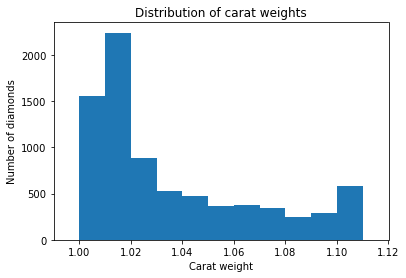

In [9]:
# histogram of carat weights - zoom in further
bin_edges = np.arange(1.0, 1.1+0.01, 0.01)
sb.distplot(diamonds['carat'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})
plt.xlim(0.99, 1.12)
plt.title('Distribution of carat weights')
plt.xlabel('Carat weight')
plt.ylabel('Number of diamonds');

<a id='cut_color_clarity'></a>
### Cut, color and clarity
All three remaining diamond C's are categorical variables and ordinal in nature. First, convert them to appropriate ordered data type in order to plot them properly:

In [10]:
# create ordered categorical data type for cut
level_order_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordered_cut = pd.api.types.CategoricalDtype(ordered = True, categories = level_order_cut)
diamonds['cut'] = diamonds['cut'].astype(ordered_cut)

# create ordered categorical data type for color
level_order_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordered_color = pd.api.types.CategoricalDtype(ordered = True, categories = level_order_color)
diamonds['color'] = diamonds['color'].astype(ordered_color)

# create ordered categorical data type for clarity
level_order_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordered_clarity = pd.api.types.CategoricalDtype(ordered = True, categories = level_order_clarity)
diamonds['clarity'] = diamonds['clarity'].astype(ordered_clarity)

In [11]:
# verify that data types of cut, color and clarity have been changed
diamonds[['cut', 'color', 'clarity']].dtypes

cut        category
color      category
clarity    category
dtype: object

__Distribution of cut__ - create both count and proportion bar plots:

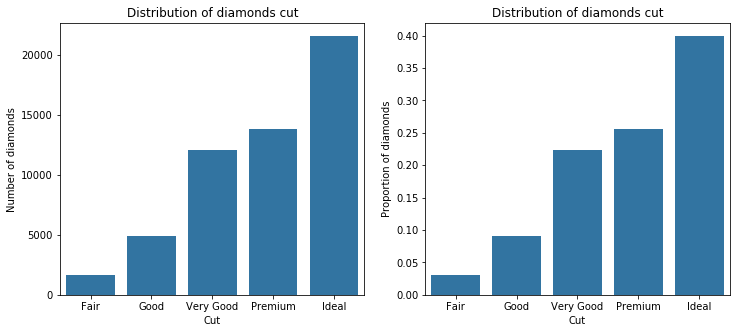

In [12]:
plt.figure(figsize = (12, 5))

# pick the color for all bars
base_color = sb.color_palette()[0]

# create bar plot showing the number of diamonds
plt.subplot(1, 2, 1)
sb.countplot(data = diamonds, x = 'cut', color = base_color)
plt.title('Distribution of diamonds cut')
plt.xlabel('Cut')
plt.ylabel('Number of diamonds')

# create bar plot showing the proportion of diamonds
max_cut = diamonds['cut'].value_counts().values[0]
n_diamonds = diamonds.shape[0]
max_prop = max_cut/n_diamonds

tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.subplot(1, 2, 2)
sb.countplot(data = diamonds, x = 'cut', color = base_color)
plt.yticks(tick_props * n_diamonds, tick_names)
plt.title('Distribution of diamonds cut')
plt.xlabel('Cut')
plt.ylabel('Proportion of diamonds');

The highest proportion of diamonds has cut Ideal. The other cuts proportions corresponding to worse quality diamonds decrease gradually. 

__Distribution of color__ - plot counts and proportions side by side:

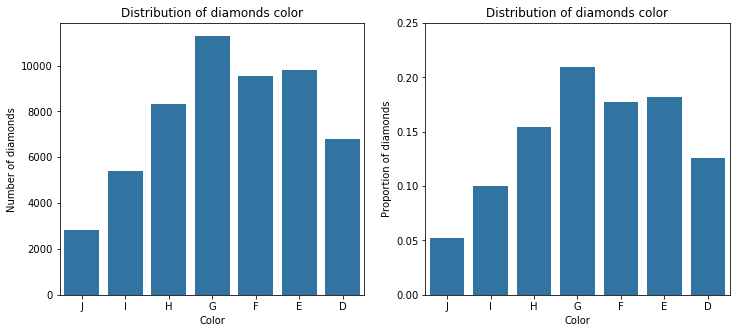

In [13]:
plt.figure(figsize = (12, 5))

# pick the color for all bars
base_color = sb.color_palette()[0]

# create bar plot showing the number of diamonds
plt.subplot(1, 2, 1)
sb.countplot(data = diamonds, x = 'color', color = base_color)
plt.title('Distribution of diamonds color')
plt.xlabel('Color')
plt.ylabel('Number of diamonds')

# create bar plot showing the proportion of diamonds
max_color = diamonds['color'].value_counts().values[0]
n_diamonds = diamonds.shape[0]
max_prop = max_color/n_diamonds

tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.subplot(1, 2, 2)
sb.countplot(data = diamonds, x = 'color', color = base_color)
plt.yticks(tick_props * n_diamonds, tick_names)
plt.title('Distribution of diamonds color')
plt.xlabel('Color')
plt.ylabel('Proportion of diamonds');

The distribution is roughly unimodal and the most frequent color grade is G.

Finally, plot __distributions of clarity__:

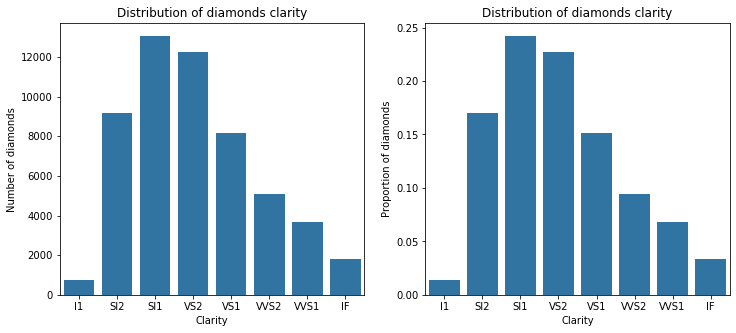

In [14]:
plt.figure(figsize = (12, 5))

# pick the color for all bars
base_color = sb.color_palette()[0]

# create bar plot showing the number of diamonds
plt.subplot(1, 2, 1)
sb.countplot(data = diamonds, x = 'clarity', color = base_color)
plt.title('Distribution of diamonds clarity')
plt.xlabel('Clarity')
plt.ylabel('Number of diamonds')

# create bar plot showing the proportion of diamonds
max_clarity = diamonds['color'].value_counts().values[0]
n_diamonds = diamonds.shape[0]
max_prop = max_color/n_diamonds

tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.subplot(1, 2, 2)
sb.countplot(data = diamonds, x = 'clarity', color = base_color)
plt.yticks(tick_props * n_diamonds, tick_names)
plt.title('Distribution of diamonds clarity')
plt.xlabel('Clarity')
plt.ylabel('Proportion of diamonds');

Distribution of clarity is slightly right skewed. The most common grades are SI2, SI1, VS2 and VS1. The worst clarity grade I1 (diamonds with inclusions) is rather rare. 

<a id='bivar_exploration'></a>
## Bivariate Exploration
<a id='price_vs_carat'></a>
### Price vs. carat weight
Since price and carat weight are both continuous numeric variables, create a scatter plot to show the relationship between them:

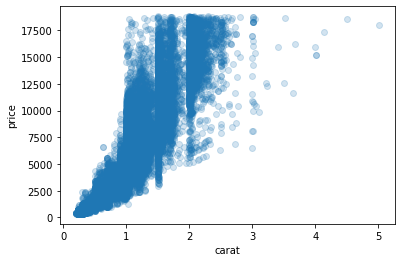

In [15]:
# basic scatter plot of price vs. carat weight
sb.regplot(diamonds['carat'], diamonds['price'], fit_reg=False, scatter_kws = {'alpha': 1/5});

The price distribution suggests a logarithmic transformation due to its long tail. Create a scatter plot with log transformed price:

In [16]:
# define function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

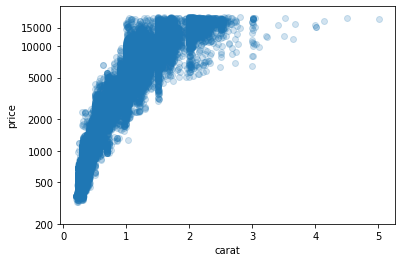

In [17]:
# create scatter plot with log transformed price vs. carat weight
sb.regplot(diamonds['carat'], diamonds['price'].apply(log_trans), fit_reg=False, scatter_kws = {'alpha': 1/5})
tick_locs = [200, 500, 1000, 2000, 5000, 10000, 15000]
plt.yticks(log_trans(tick_locs), tick_locs);

The trend is still not linear. The authors of the course suggest to use cube-root transformed x-axis (carat weight) to derive a linear relationship, because the x, y and z dimensions show much more linear relationship towards the price, weight is proportional to volume and carat is more recognizable when it comes to comparison between diamonds. Add cube-root transformation:

In [18]:
# define function for cube-root transformation
def cube_root_trans(x, inverse = False):
    if not inverse:
        return np.power(x, 1/3)
    else:
        return np.power(x, 3)

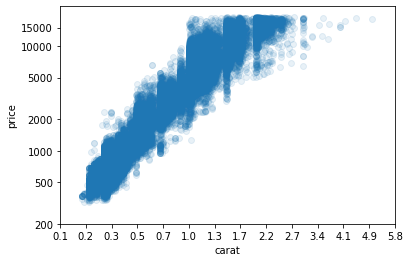

In [19]:
# create scatter plot of log transformed price vs. cube-root transformed carat weight
sb.regplot(diamonds['carat'].apply(cube_root_trans), diamonds['price'].apply(log_trans), 
           fit_reg=False, scatter_kws = {'alpha': 1/10})
tick_locs_y = [200, 500, 1000, 2000, 5000, 10000, 15000]
plt.yticks(log_trans(tick_locs_y), tick_locs_y)
tick_locs_x = np.arange(0.5, cube_root_trans(diamonds['carat'].max())+0.1, 0.1)
plt.xticks(tick_locs_x, cube_root_trans(tick_locs_x, inverse = True).round(1));

It looks like the price does not continue to increase after the value of about 1.5 carat. 

<a id='price_vs_ccc'></a>
### Price vs. cut, color and clarity
Create violin plots and box plots to assess the price distribution and basic statistics in relation to cut, color and clarity:

In [20]:
# set the base color for all plots
base_color = sb.color_palette()[0]

__Price and cut__

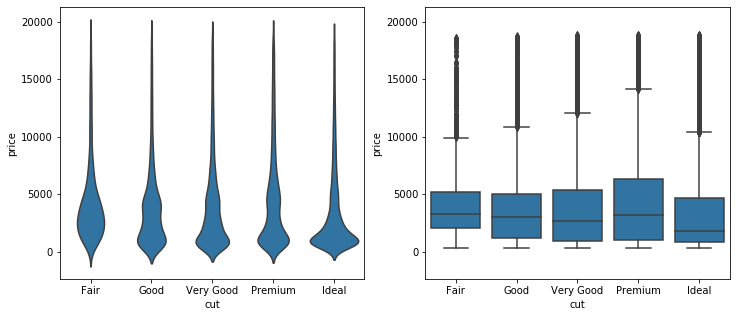

In [21]:
# price vs. cut
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'cut', y = 'price', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim());

__Price and color__

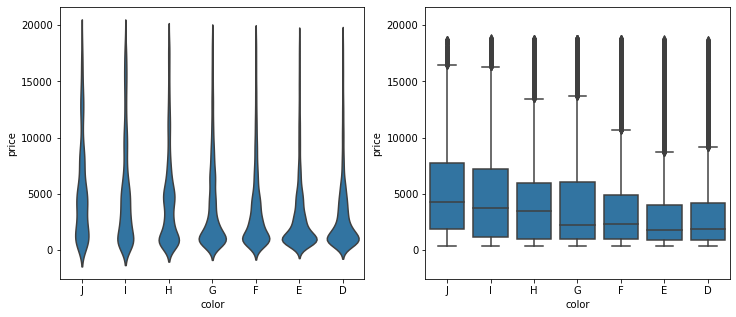

In [22]:
# price vs. color
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'color', y = 'price', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'color', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim());

__Price and clarity__

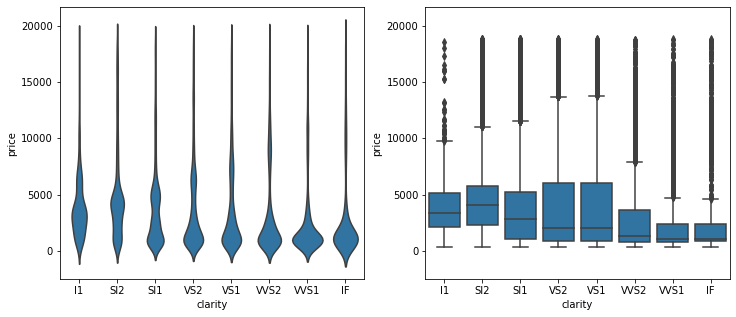

In [23]:
# price vs. clarity
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'clarity', y = 'price', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim());

There are multiple modes for each ordinal variable visible in the violin plots. Box plots are better to spot the differences in statistics, like median, across the levels within each variable.  

The median price is observed to decrease with increasing quality, which is not quite expected. On the other hand, the violin plots reveal the nature of the price distribution within each variable and its category. 

<a id='carat_vs_ccc'></a>
### Carat weight vs. cut, color and clarity
Use violin plots and box plots to assess the relationships between the carat weight (independent variable, on the contrary to price) and cut, color and clarity.

__Carat weight and cut__

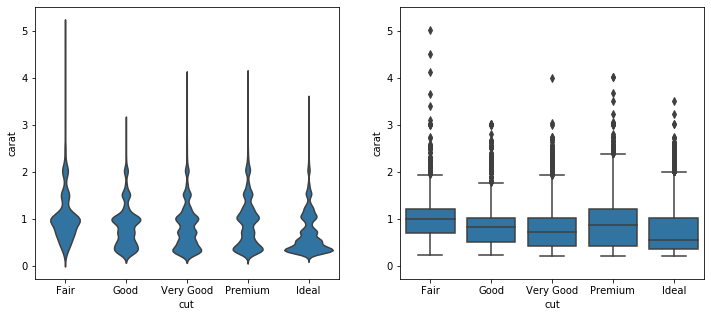

In [24]:
# carat vs. cut
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'cut', y = 'carat', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'cut', y = 'carat', color = base_color)
plt.ylim(ax1.get_ylim());

__Carat weight and color__

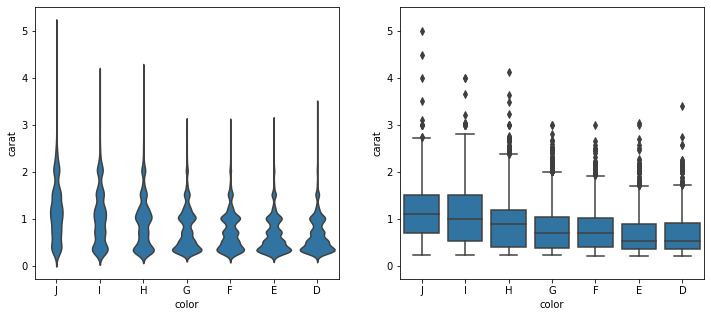

In [25]:
# carat vs. color
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'color', y = 'carat', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'color', y = 'carat', color = base_color)
plt.ylim(ax1.get_ylim());

__Carat weight and clarity__

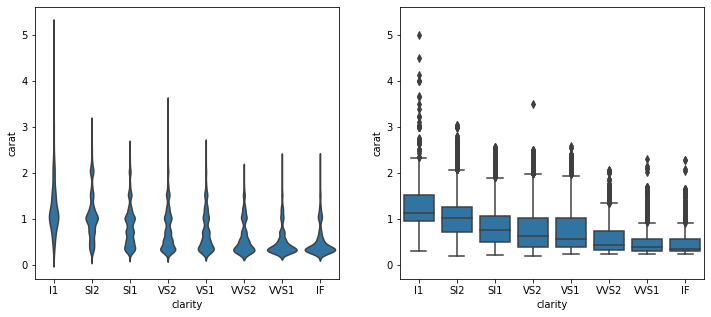

In [26]:
# carat vs. clarity
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = diamonds, x = 'clarity', y = 'carat', color = base_color, inner = None)

plt.subplot(1, 2, 2)
sb.boxplot(data = diamonds, x = 'clarity', y = 'carat', color = base_color)
plt.ylim(ax1.get_ylim());

From observation of these additional plots it might be concluded, that larger diamonds tend to have lower quality, and smaller diamonds tend to have higher quality.